<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/UCLStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import seaborn as sns

In [2]:
# Importing the dataset:
uefa_competitions = pd.ExcelFile('UEFA Competitions finals.xlsx')
ucl = pd.read_excel(uefa_competitions, 'UEFA Champions League finals')

# Displaying the last 5 champions:
ucl.tail()

,Season,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won
63,2018–19,England,Liverpool,2–0,Tottenham Hotspur,England,Metropolitano Stadium,Madrid,Spain,63272,Regular time
64,2019–20,Germany,Bayern Munich,1–0,Paris Saint-Germain,France,Estádio da Luz,Lisbon,Portugal,0,Regular time
65,2020–21,England,Chelsea,1–0,Manchester City,England,Estádio do Dragão,Porto,Portugal,14110,Regular time
66,2021–22,Spain,Real Madrid,1–0,Liverpool,England,Stade de France,Saint-Denis,France,75000,Regular time
67,2022–23,England,Manchester City,1–0,Inter Milan,Italy,Atatürk Olympic Stadium,Istanbul,Turkey,71412,Regular time


In [3]:
# Displaying the number of rows and columns in the dataset:
ucl.shape

(68, 11)

In [4]:
# Displaying the datatypes presented in the columns:
ucl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Season                 68 non-null     object
 1   Winners country        68 non-null     object
 2   Winners                68 non-null     object
 3   Score                  68 non-null     object
 4   Runners-up             68 non-null     object
 5   Runners-up country     68 non-null     object
 6   Venue                  68 non-null     object
 7   Host city              68 non-null     object
 8   Host Country           68 non-null     object
 9   Attendance             68 non-null     int64 
 10  How the match was won  68 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.0+ KB


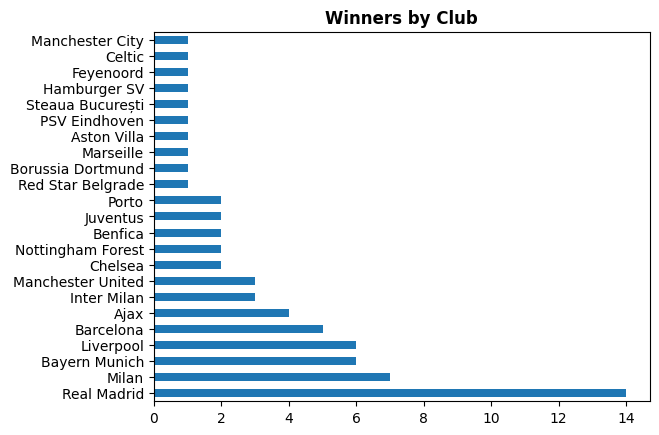

In [15]:
# Displaying number of titles by club:
ucl.groupby('Season').first()['Winners'].value_counts().plot(kind = 'barh')
plt.ylabel(None)
plt.title('Winners by Club', fontweight = 'bold')
plt.show()

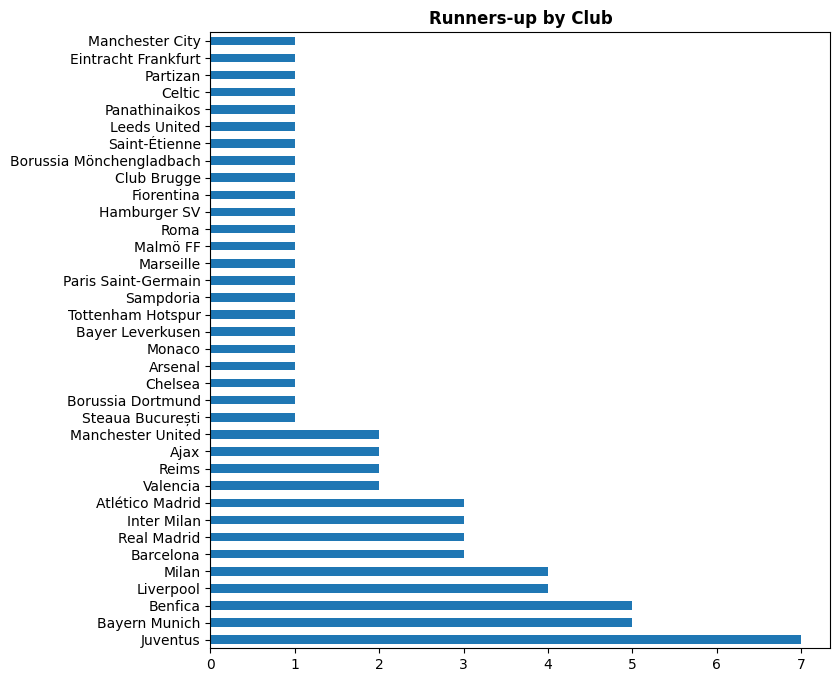

In [16]:
# Displaying number of runners-up by club:
ucl.groupby('Season').first()['Runners-up'].value_counts().plot(kind = 'barh',
                                                             figsize = (8, 8))
plt.ylabel(None)
plt.title('Runners-up by Club', fontweight = 'bold')
plt.show()

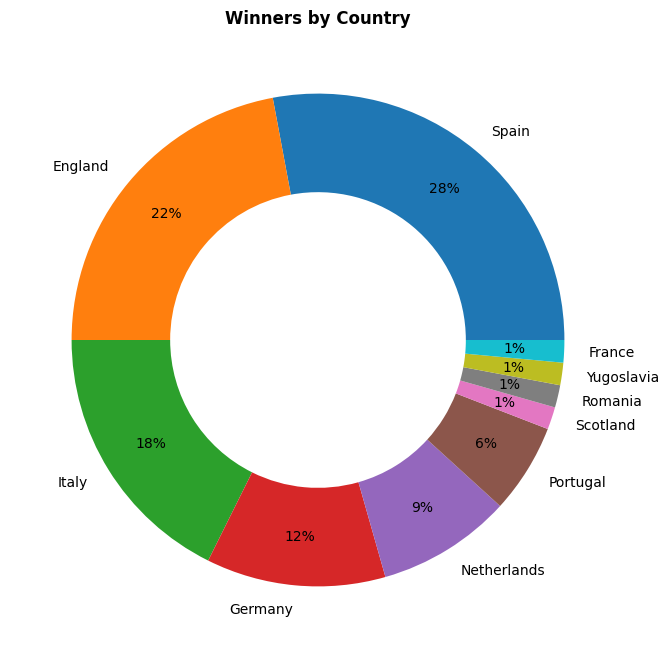

In [18]:
# Displaying number of titles by country:
ucl.groupby('Season').first()['Winners country'].value_counts().plot(kind = 'pie',
                                                                     autopct = '%.0f%%',
                                                                     figsize = (8, 8),
                                                                     wedgeprops = dict(width = 0.4),
                                                                     pctdistance = 0.8)
plt.ylabel(None)
plt.title('Winners by Country', fontweight = 'bold')
plt.show()

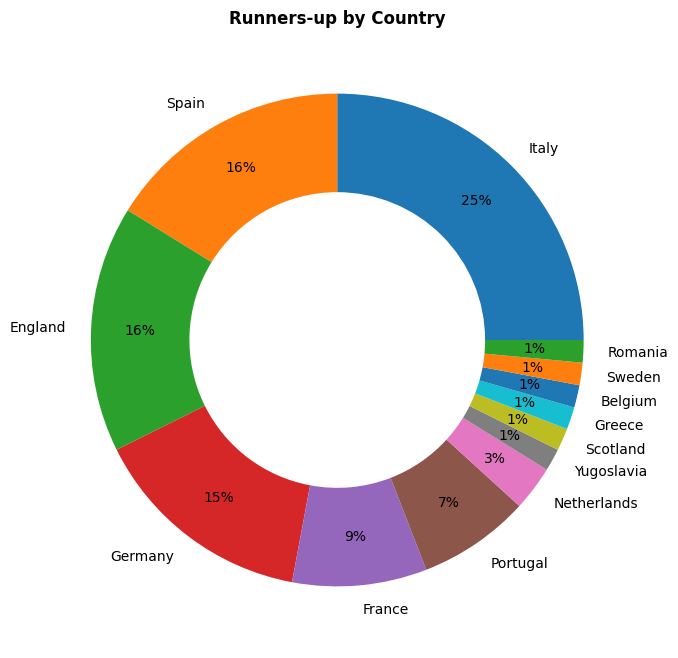

In [19]:
# Displaying number of runners-up by country:
ucl.groupby('Season').first()['Runners-up country'].value_counts().plot(kind = 'pie',
                                                                        autopct = '%.0f%%',
                                                                        figsize = (8, 8),
                                                                        wedgeprops = dict(width = 0.4),
                                                                        pctdistance = 0.8)
plt.ylabel(None)
plt.title('Runners-up by Country', fontweight = 'bold')
plt.show()

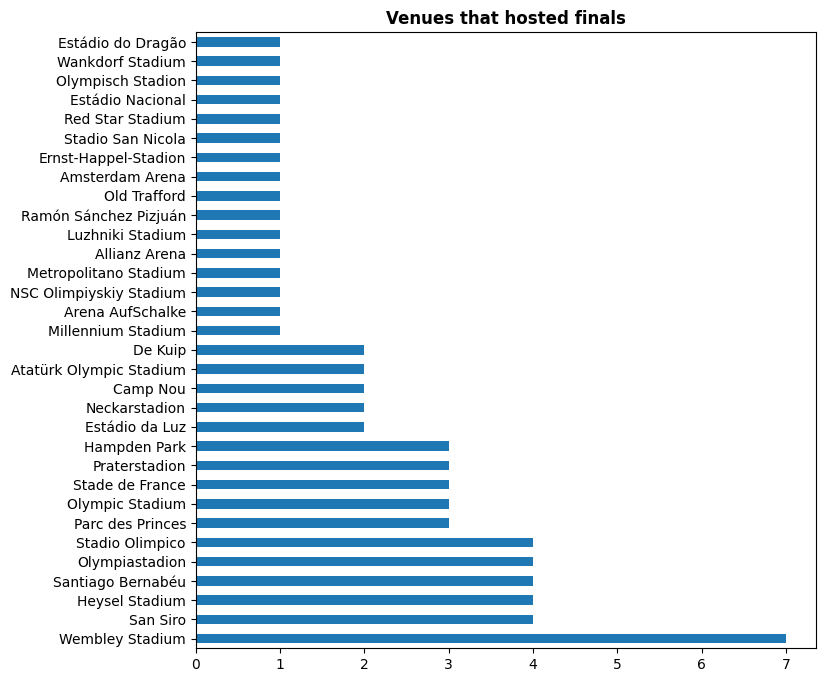

In [20]:
# Displaying distribution of venues that hosted finals:
ucl.groupby('Season').first()['Venue'].value_counts().plot(kind = 'barh',
                                                           figsize = (8, 8))
plt.ylabel(None)
plt.title('Venues that hosted finals', fontweight = 'bold')
plt.show()

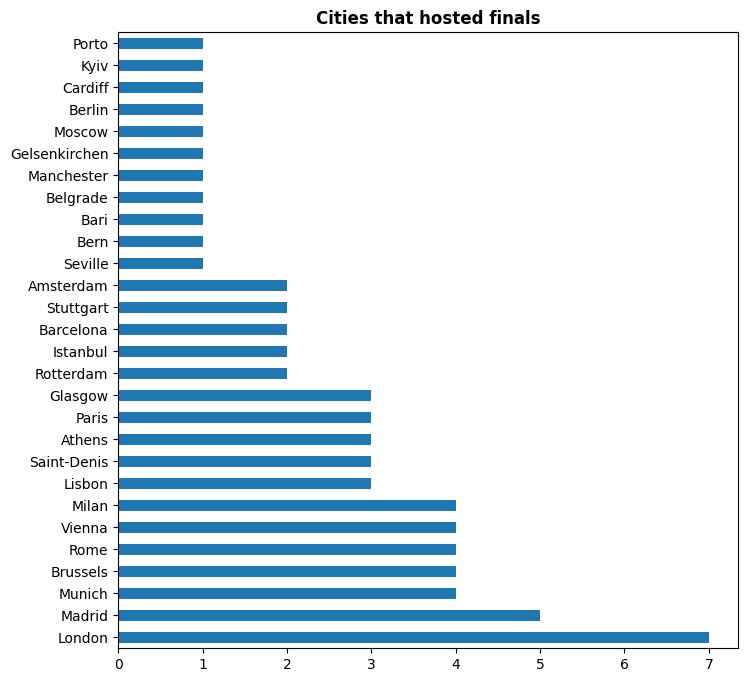

In [21]:
# Displaying distribution of cities that hosted finals:
ucl.groupby('Season').first()['Host city'].value_counts().plot(kind = 'barh',
                                                               figsize = (8, 8))
plt.ylabel(None)
plt.title('Cities that hosted finals', fontweight = 'bold')
plt.show()

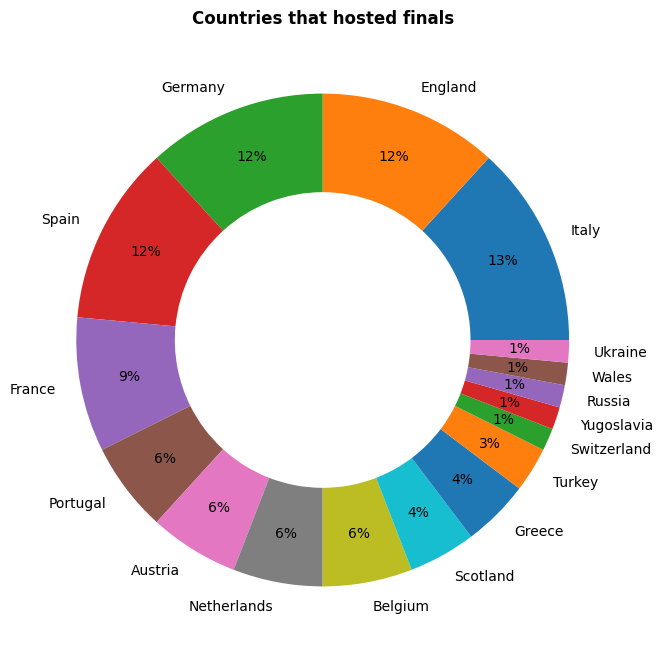

In [22]:
# Displaying distribution of countries that hosted finals:
ucl.groupby('Season').first()['Host Country'].value_counts().plot(kind = 'pie',
                                                                  autopct = '%.0f%%',
                                                                  figsize = (8, 8),
                                                                  wedgeprops = dict(width = 0.4),
                                                                  pctdistance = 0.8)
plt.ylabel(None)
plt.title('Countries that hosted finals', fontweight = 'bold')
plt.show()

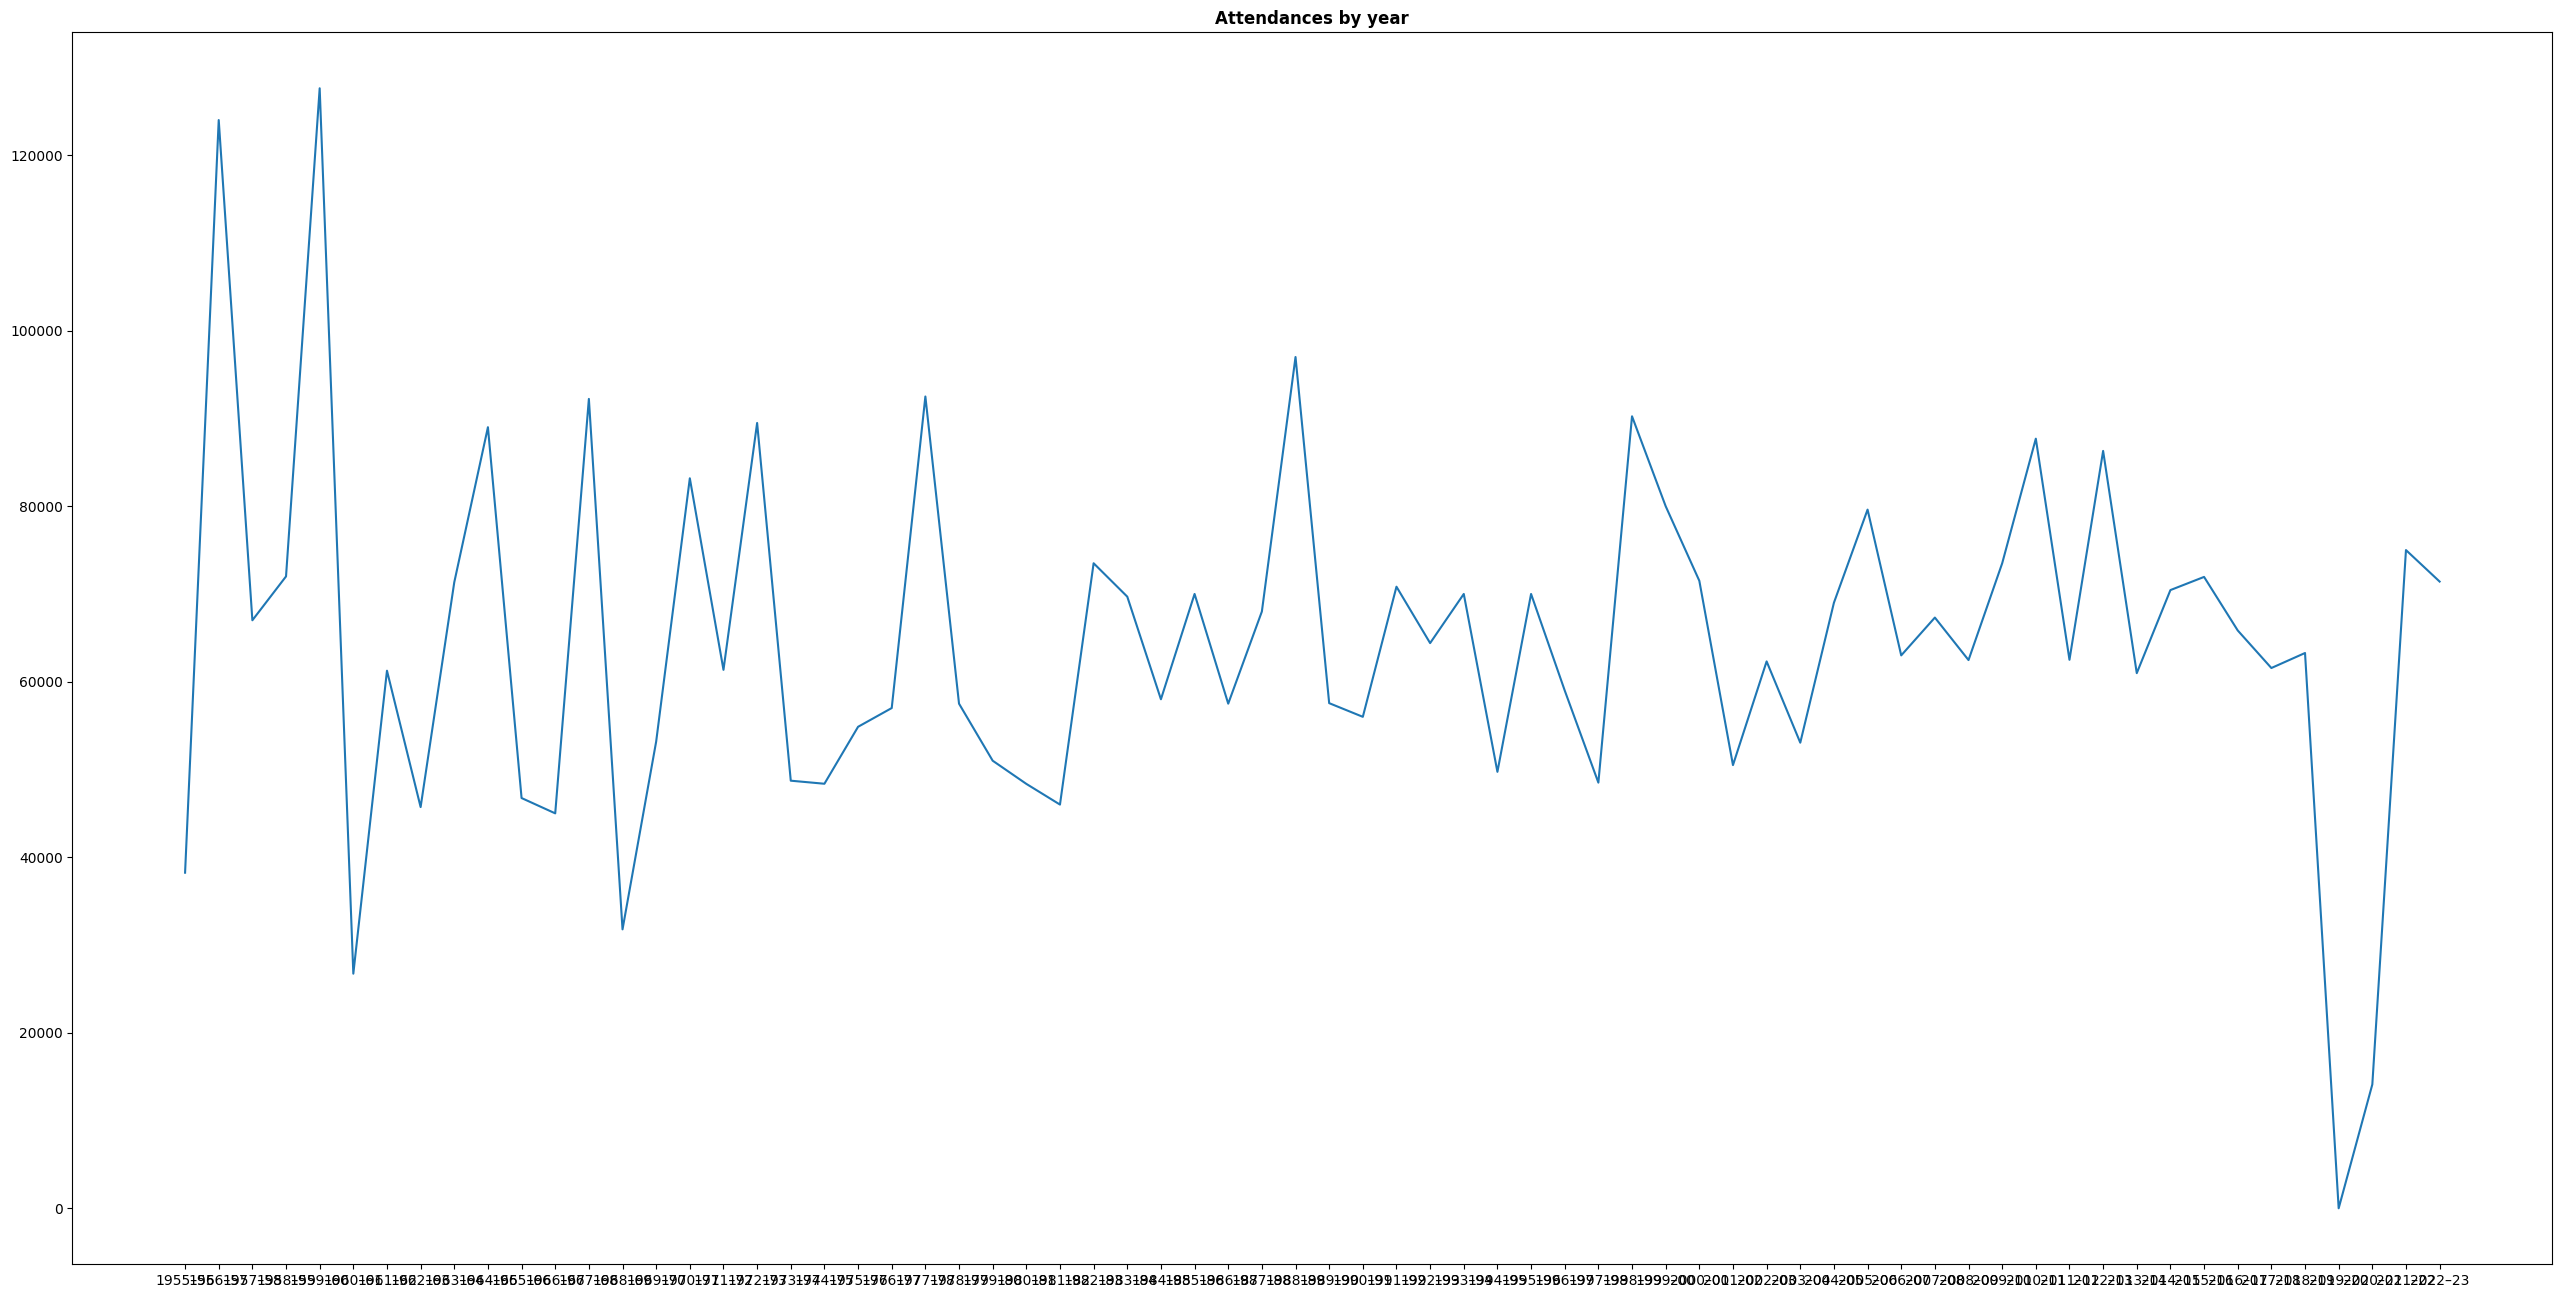

In [26]:
# Displaying the attendances by year:
plt.figure(figsize = (32,16))
plt.title('Attendances by year', fontweight = 'bold')
plt.plot(ucl['Season'], ucl['Attendance'])
plt.show()